# Exercises for 2.1


## Step 1

Read the file train.csv into Python and print a few rows.



In [10]:
import pandas as pd
import seaborn as sns

In [11]:
df = pd.read_csv('../00_data/train.csv')

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



## Step 2

Calculate the number of surviving/non-surviving passengers and display it as a bar plot.


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

   status  Survived
0       0       549
1       1       342


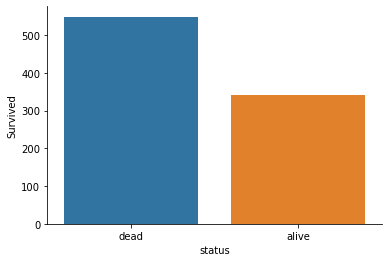

In [14]:
life_status = pd.DataFrame(df.Survived.value_counts()).reset_index().rename(columns = {'index': 'status'})
print(life_status)

fig = sns.barplot(data = life_status, y = 'Survived', x = 'status')
sns.despine()
fig.set_xticks(ticks = [0,1], labels = ['dead', 'alive'])


## Step 3

Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.


In [15]:
crossdf = pd.DataFrame(pd.crosstab(df.Pclass, df.Survived,margins=True)).reset_index(level = 'Pclass', col_level=1)
print(crossdf)




first_survived = crossdf.loc[crossdf['Pclass'] == 1, 1] / crossdf.loc[crossdf['Pclass'] == 1, 'All']

print(f'Around {round(first_survived.values[0]*100)} % of 1st class passengers survived')

Survived Pclass    0    1  All
0             1   80  136  216
1             2   97   87  184
2             3  372  119  491
3           All  549  342  891
Around 63 % of 1st class passengers survived



## Step 4

Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.



In [16]:
# crossdf_sex = pd.DataFrame(pd.crosstab(df.Pclass, [df.Sex, df.Survived])).reset_index(level = 'Pclass', col_level=[0,1])

crossdf_sex = df.groupby(['Pclass', 'Sex', 'Survived']).size().reset_index(name = 'counts')


crossdf_sex



,Pclass,Sex,Survived,counts
0,1,female,0,3
1,1,female,1,91
2,1,male,0,77
3,1,male,1,45
4,2,female,0,6
5,2,female,1,70
6,2,male,0,91
7,2,male,1,17
8,3,female,0,72
9,3,female,1,72


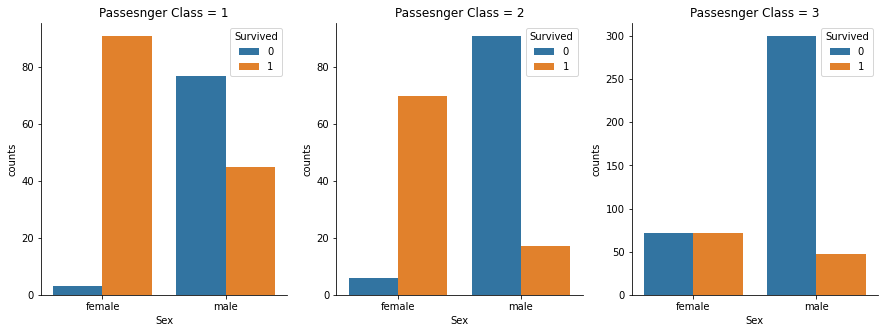

In [17]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))


for pc in [1,2,3]:
    sns.barplot(
        data = crossdf_sex.loc[crossdf_sex['Pclass'] == pc, :],
        x = 'Sex',
        y = 'counts',
        hue = 'Survived', 
        ax = axs[pc-1], 
        ci = None).set_title(f'Passesnger Class = {pc}')

sns.despine()

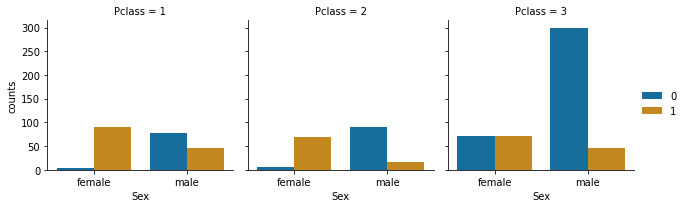

In [18]:
# Alternative with less clutter

g = sns.FacetGrid(crossdf_sex, col="Pclass",)
g.map(sns.barplot, 
 'Sex',
 'counts', 
 'Survived', 
 dodge = True, 
 order = ['female', 'male'],
 hue_order = [0,1],
 palette = sns.palettes.color_palette('colorblind', 2)
)

g.add_legend()



## Step 5

Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.



(array([ 18.,  16.,  99., 110.,  64.,  45.,  38.,  15.,  13.,   6.]),
 array([ 1. ,  8.3, 15.6, 22.9, 30.2, 37.5, 44.8, 52.1, 59.4, 66.7, 74. ]),
 <BarContainer object of 10 artists>)

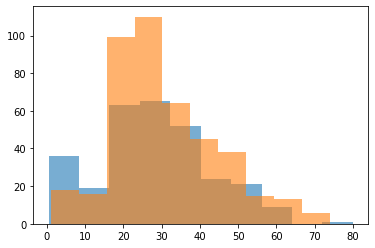

In [10]:
# fig, ax = plt.figure(figsize = (5,5))
df.columns
# df.loc[df['Survived' == 1, 'Age']]
# df.loc[df['Survived' == 1, 'Sex']].plot.hist()
plt.hist(df.loc[df['Survived'] == 1, 'Age'], label = 'Survived', alpha = 0.6)
plt.hist(df.loc[df['Survived'] == 0, 'Age'], label = 'Deceased', alpha = 0.6)

<AxesSubplot:xlabel='Age', ylabel='Count'>

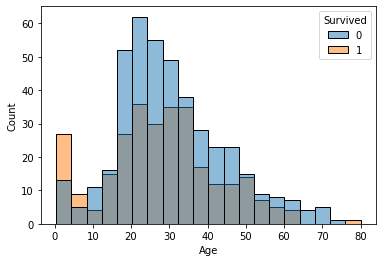

In [11]:
sns.histplot(data = df, x = 'Age', hue = 'Survived')


## Step 6

Calculate the average age for survived and drowned passengers separately.



In [12]:
import numpy as np

df.groupby('Survived').Age.agg(np.mean)

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


## Step 7

Replace missing age values by the mean age.



In [13]:
df['age_filled']= df.groupby('Survived')['Age'].apply(lambda x: x.fillna(x.mean()))

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_filled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


## Step 8

Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [15]:
crossdf_sex


,Pclass,Sex,Survived,counts
0,1,female,0,3
1,1,female,1,91
2,1,male,0,77
3,1,male,1,45
4,2,female,0,6
5,2,female,1,70
6,2,male,0,91
7,2,male,1,17
8,3,female,0,72
9,3,female,1,72


# Exercisees for 2.2

## Make features

In [16]:
X, y = df.Pclass, df.Survived

## Step 3: Split data

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

## Step 4: Exploratory Analyses


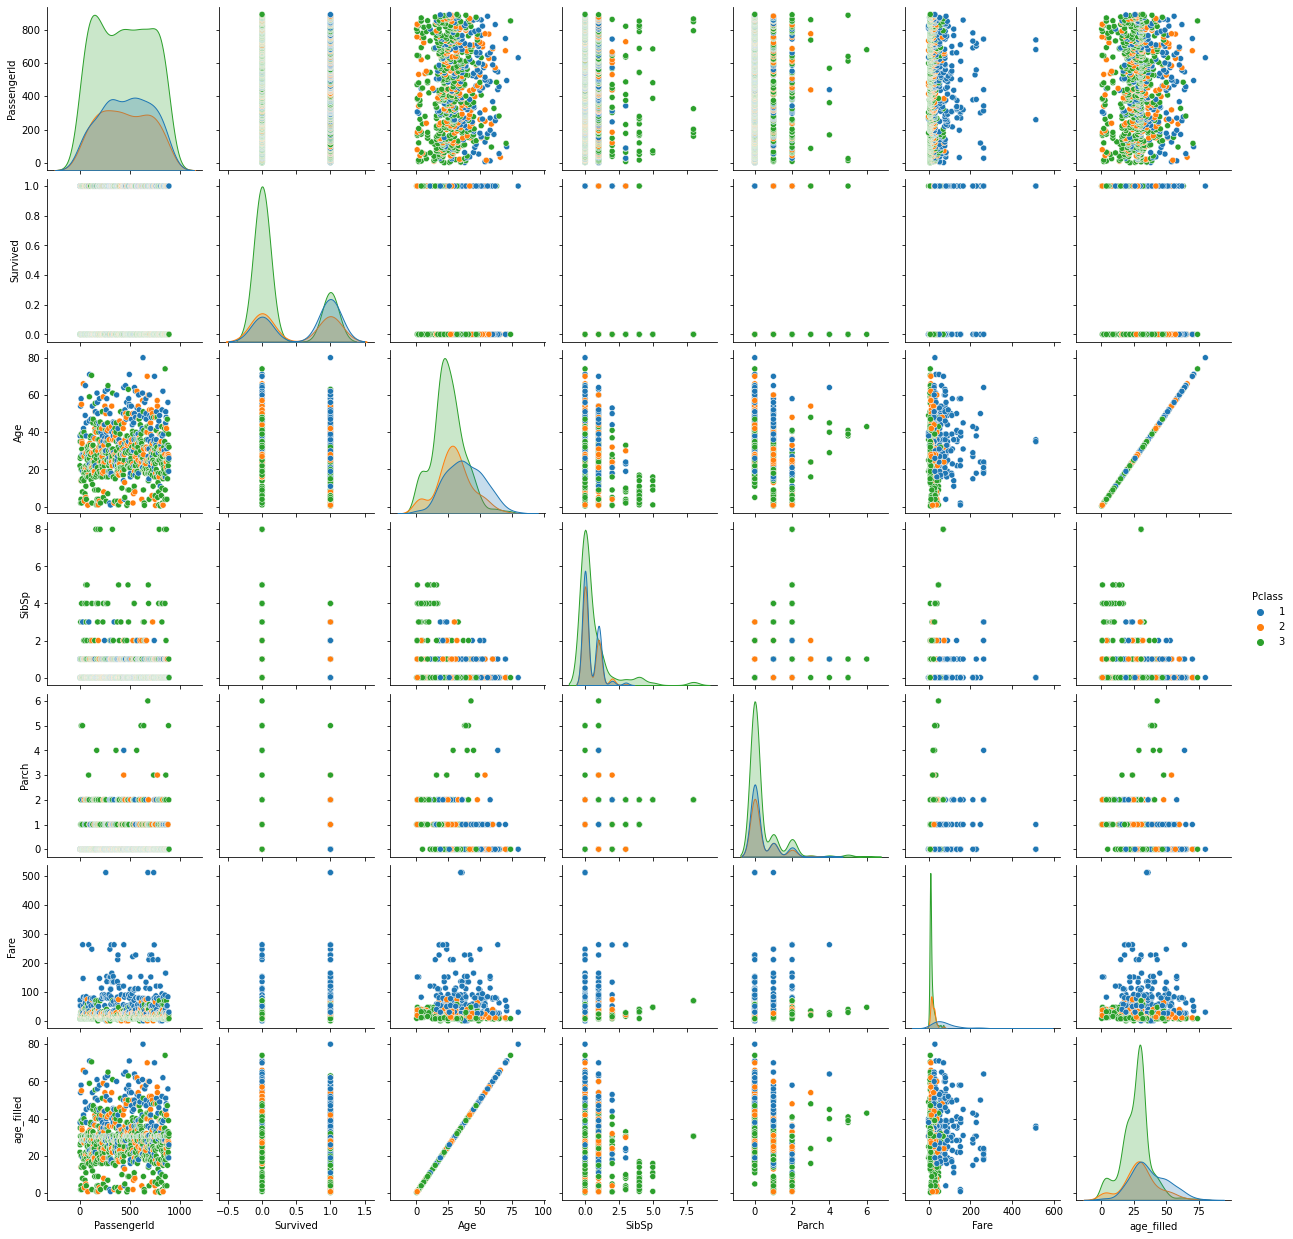

In [18]:
sns.pairplot(df, hue = 'Pclass', palette='tab10')


## Build Dummy Classifier

In [19]:
from sklearn.dummy import DummyClassifier

dm = DummyClassifier(strategy='most_frequent')
dm.fit(X, y)
ypred = dm.predict(X)



# Exercises for 2.3

- Build a LogReg model for the Titanic data.

- Start with the Pclass column only (because it is numerical and complete).

- Print the coefficients calculated by the model.



In [20]:
# Create features and response
X = df[['Pclass']]
y = df['Survived']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42)


for d in [X_train, X_test, y_train,y_test]:
    print(d.shape)

(712, 1)
(179, 1)
(712,)
(179,)


In [21]:
# Load model
from sklearn.linear_model import LogisticRegression
m = LogisticRegression( class_weight= 'balanced')

# fit model
m.fit(X_train, y_train)

# inspect results
m.coef_, m.intercept_


(array([[-0.81546945]]), array([1.85856922]))


Calculate the probabilities for your data points belonging to the positive class.


In [22]:
# m.predict_proba(X)
# m.predict_proba(X)[:,1]
probs = pd.DataFrame({'p' : m.predict_proba(X)[:,1]})


In [23]:
# compare scores on train and test
[round(x,2) for x in [
    m.score(X_train, y_train),
    m.score(X_test, y_test), 
    dm.score(X_test,y_test)]]

[0.67, 0.68, 0.59]


Suppose you classify all points with a probability > 0.9 as positive.

How does the result of your prediction change?


In [24]:
condlist = [
    probs['p'] > 0.9,
    probs['p'] <= 0.9,
]
choicelist = [
    1,
    0,
]

probs['adj_y'] = np.select(condlist, choicelist)

            p  adj_y
0    0.357131      0
1    0.739448      0
2    0.357131      0
3    0.739448      0
4    0.357131      0
..        ...    ...
886  0.556663      0
887  0.739448      0
888  0.357131      0
889  0.739448      0
890  0.357131      0

[891 rows x 2 columns]


<AxesSubplot:xlabel='p', ylabel='Count'>

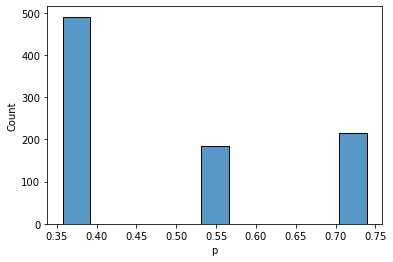

In [25]:
print(probs)

sns.histplot(probs.p)


Is this because of the 3 levels of `Pclass`?



In [26]:
pred_y = m.predict(X)


adj_preds = pd.concat([probs, pd.DataFrame({'pred_y' : pred_y})], axis = 1)

pd.crosstab(adj_preds.iloc[:,1], adj_preds.iloc[:,2])
# adj_preds.iloc[:,1]
# adj_preds.iloc[:,2]

pred_y,0,1
adj_y,,
0,491,400



How does it change if you change the threshold to > 0.1?



The classification is shifted entirely to none (>.9) or all survived (>.1)

In [27]:
condlist = [
    probs['p'] > 0.1,
    probs['p'] <= 0.1,
]
choicelist = [
    1,
    0,
]
probs = pd.DataFrame({'p' : m.predict_proba(X)[:,1]})


probs['adj_y'] = np.select(condlist, choicelist)

adj_preds = pd.concat([probs, pd.DataFrame({'pred_y' : pred_y})], axis = 1)

pd.crosstab(adj_preds.iloc[:,1], adj_preds.iloc[:,2])



pred_y,0,1
adj_y,,
1,491,400


In [28]:
condlist = [
    probs['p'] > 0.5,
    probs['p'] <= 0.5,
]
choicelist = [
    1,
    0,
]
probs = pd.DataFrame({'p' : m.predict_proba(X)[:,1]})


probs['adj_y'] = np.select(condlist, choicelist)

adj_preds = pd.concat([probs, pd.DataFrame({'pred_y' : pred_y})], axis = 1)

pd.crosstab(adj_preds.iloc[:,1], adj_preds.iloc[:,2])



pred_y,0,1
adj_y,,
0,491,0
1,0,400


### Repeat with Pclass and imputed Age



In [29]:
# Create features and response
X = df[['Pclass', 'age_filled']]
y = df['Survived']



In [30]:

# pd.DataFrame(pfeatures, columns=enc.get_feature_names(['Pclass']))
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42)


for d in [X_train, X_test, y_train,y_test]:
    print(d.shape)


(712, 2)
(179, 2)
(712,)
(179,)


In [31]:
# Load model
from sklearn.linear_model import LogisticRegression
m = LogisticRegression( class_weight= 'balanced')

# fit model
m.fit(X_train, y_train)

# inspect results
m.coef_, m.intercept_


y_exp = 1/(1+np.exp(-(m.intercept_ + 
    m.coef_[0,0]*X.Pclass +
    m.coef_[0,1]*X.age_filled)))


# alternative with matrix multiplication

# np.matmul(X_train, m.coef_.transpose()) + m.intercept_

# y_exp = 1/(1+np.exp(-(np.matmul(X_train, m.coef_.transpose()) + m.intercept_)))

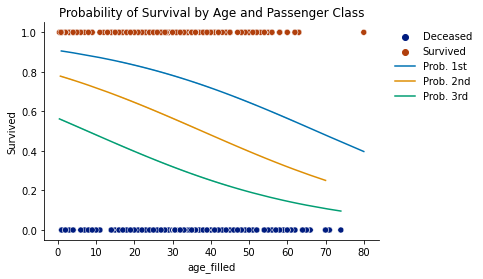

In [32]:
fig = sns.scatterplot(
    x = X.age_filled,
    y = y, 
    hue = y,
    palette=sns.palettes.color_palette('dark', 2)
    )

cols = sns.palettes.color_palette('colorblind', 3)
# cols = ['black', 'firebrick', 'purple']

for pc in [1,2,3]:
    sns.lineplot(x = X.loc[X.Pclass == pc, 'age_filled'], 
    y = y_exp[X.Pclass == pc], 
    # hue = X.loc[X.Pclass == pc, 'Pclass'],
    color = cols[pc-1], 
    label = f'PClass: {pc}')

sns.despine()
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, frameon = False)
fig.set(title = 'Probability of Survival by Age and Passenger Class')


labs = ['Deceased', 'Survived', 'Prob. 1st', 'Prob. 2nd', 'Prob. 3rd']

for t, l in zip(fig.legend_.texts, labs):
    t.set_text(l)


In [33]:
sns.palettes.color_palette('colorblind', 3)
sns.palettes.color_palette('dark', 2)

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744)]

### Alternative with matrix mult and one hot encoding

In [34]:
from sklearn.preprocessing import OneHotEncoder

# Create features and response
X = df[['Pclass', 'age_filled']]
y = df['Survived']
# onehot encode pclass
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)
enc.fit(X[['Pclass']])
pfeatures = enc.transform(X[['Pclass']])
# enc.get_feature_names(['Pclass'])
pfeatures
X = pd.concat([X[['age_filled']], pd.DataFrame(pfeatures)], axis = 1)

# pd.DataFrame(pfeatures, columns=enc.get_feature_names(['Pclass']))
# pd.DataFrame(pfeatures, columns=enc.get_feature_names(['Pclass']))
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42)


for d in [X_train, X_test, y_train,y_test]:
    print(d.shape)



(712, 4)
(179, 4)
(712,)
(179,)


In [35]:
# Load model
from sklearn.linear_model import LogisticRegression
m = LogisticRegression( class_weight= 'balanced')

# fit model
m.fit(X_train, y_train)

# inspect results
m.coef_, m.intercept_

print(m.coef_)

print(m.coef_.shape)

# alternative with matrix multiplication
y_exp = 1/(1+np.exp(-(np.matmul(X, m.coef_.transpose()) + m.intercept_)))


[[-0.03306652  0.90017777  0.15063767 -1.05077751]]
(1, 4)


In [36]:
X.shape
y_exp[0]

0      0.374202
1      0.712521
2      0.343779
3      0.732405
4      0.280073
         ...   
886    0.627580
887    0.822871
888    0.310139
889    0.786584
890    0.300504
Name: 0, Length: 891, dtype: float64

[Text(0.5, 1.0, 'Probability of Survival by Age and Passenger Class')]

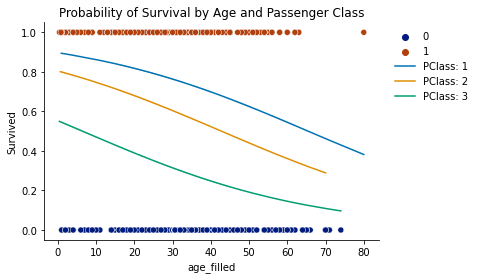

In [37]:
fig = sns.scatterplot(
    x = X.age_filled,
    y = y, 
    hue = y,
    palette=sns.palettes.color_palette('dark', 2)
    )

cols = sns.palettes.color_palette('colorblind', 3)
# cols = ['black', 'firebrick', 'purple']

for pc in [1,2,3]:
    sns.lineplot(x = X.loc[df.Pclass == pc, 'age_filled'], 
    y = y_exp[0][df.Pclass == pc], 
    # hue = X.loc[X.Pclass == pc, 'Pclass'],
    color = cols[pc-1], 
    label = f'PClass: {pc}')

# sns.lineplot(x = X.age_filled, y = y_exp[0], color = 'black')
sns.despine()
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, frameon = False)
fig.set(title = 'Probability of Survival by Age and Passenger Class')



**improve:** 

- create prediction grid along dims age and Pclass for smooth and full/equal range estimates of $\hat{p}$

# 2.6 Exercises for Feature Engineering

Bonus Q's:



Go through each column of the titanic dataset:

- check wether the column is binary, categorical or metric.

- check wether the column contains any missing values.

- make a list of preprocessors that you want to apply to each column.

- What Feature Engineerings could improve the model?


In [38]:
# Dtype checks

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
age_filled     float64
dtype: object

In [39]:
# missingness checks
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
age_filled       0
dtype: int64

In [40]:
# missingness checks
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
age_filled       0
dtype: int64

## list of column processors:


- impute the missing values in the Age column

- one-hot-encode the Embarked column

- bin the imputed Age column into 3 bins (young, middle-aged, old)

- scale the Fare column



In [41]:
from sklearn.pipeline import make_pipeline



- Pass a list of sklearn transformers for preprocessing

### One Hot Transformers

In [42]:

cat_pipe = make_pipeline(
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)

### Custom Transformers

0      20-50]
1      20-50]
2      20-50]
3      20-50]
4      20-50]
        ...  
886    20-50]
887     0-20]
888    20-50]
889    20-50]
890    20-50]
Name: age_filled, Length: 891, dtype: category
Categories (3, object): ['0-20]' < '20-50]' < '50-100]']

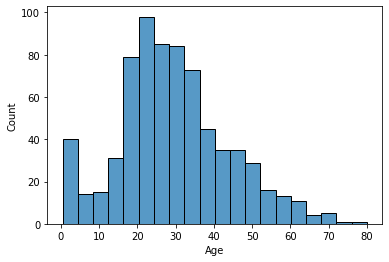

In [43]:
sns.histplot(df.Age)
# arbitrary bins: [0:20[, [20:50[, [50:100]

pd.cut(df.age_filled, 
bins=[0, 20, 50, 100], 
labels = ['0-20]', '20-50]', '50-100]'])

In [44]:
# def bin_age(x):
#     out = pd.cut(x.iloc[:,0], 
#     bins=[0, 20, 50, 100], 
#     labels = ['0-20]', '20-50]', '50-100]'])
#     out=pd.DataFrame({'age_bin' : out})
#     return out



def bin_age(x):
    out = pd.cut(x[['age_filled']].iloc[:,0], 
    bins=[0, 20, 50, 100], 
    labels = ['0-20]', '20-50]', '50-100]'])
    out=pd.DataFrame({'age_bin' : out})
    return out


In [45]:
from sklearn.preprocessing import FunctionTransformer

In [46]:
# test = X[['age_filled']]
# pd.cut(test.iloc[:,0], bins = [0,20,50])


# bin_age(X[['age_filled']])
bin_age(X)

,age_bin
0,20-50]
1,20-50]
2,20-50]
3,20-50]
4,20-50]
...,...
886,20-50]
887,0-20]
888,20-50]
889,20-50]


In [47]:
aBin = FunctionTransformer(bin_age, validate=False)
aBin.fit_transform(X)



,age_bin
0,20-50]
1,20-50]
2,20-50]
3,20-50]
4,20-50]
...,...
886,20-50]
887,0-20]
888,20-50]
889,20-50]


In [48]:
num_to_cat_pipe = make_pipeline(
    aBin
)



### Numeric transformers

In [49]:
from sklearn.preprocessing import MinMaxScaler
# num_pipe = make_pipeline(
#     MinMaxScaler()
# )

# Column Transformer

In [50]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'age_filled'],
      dtype='object')

In [51]:
from sklearn.compose import ColumnTransformer

## Solution with replacing data

In [52]:
from sklearn.impute import SimpleImputer


fill_nans = ColumnTransformer([
    ('fill_nans', SimpleImputer(strategy = 'most_frequent'), ['Embarked'])
    ])

    

cat_and_scale = ColumnTransformer([
    # 'do_nothing', 'passthrough', ['Sample Number'])
    # ('one_hot_encoder', cat_pipe, ['Sex', 'Embarked']),
    ('one_hot_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Pclass', 'age_bins', 'Sex', 'Embarked']),
    ('fare_scale', MinMaxScaler(feature_range= (0,1)), ['Fare'])
])


In [53]:
# redefine data
df['age_filled']= df.groupby('Survived')['Age'].apply(lambda x: x.fillna(x.mean()))
X, y = df.drop('Survived',axis = 1), df.Survived


In [54]:
# X_temp = X
# X_temp['Embarked'] = fill_nans.fit_transform(X_temp)
# X_temp['age_bins'] = age_preprocess.fit_transform(X_temp)

# X_temp = cat_and_scale.fit_transform(X_temp)
# print(X_temp.shape)

# cat_and_scale.transformers_[0][1].get_feature_names()






In [55]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

-------

## Solution using only pipeline

Note that `pd.cut` expects a series, not a dataframe. The wrapper `frame_cut` circumvents the issue, by leveraging `DataFrame.apply`. 

One approach to constructing (unnamed) pipelines is:

- make a function `f` that works on and returns a data frame
- pass `f` through `FunctionTransformer`
- to chain transformations, add `f` to a pipeline (e.g., to cut and discretize after)
- pass the pipeline into column transformer, where specific columns can be selected for each indidvidual transformation or pipeline!

**No need to sort out which columns are addressed in `f`, as `ColumnTransformer` passes them to the pipeline step**



In [56]:

def frame_cut(X, bins = [0, 20, 50, 100], labels = ['0-20]', '20-50]', '50-100]']):
    return X.apply(pd.cut, axis = 0, bins = bins, right=True, labels=labels)

pdcut = FunctionTransformer(frame_cut, kw_args = {'bins' :[0, 20, 50, 100], 
    'labels' : ['0-20]', '20-50]', '50-100]']})


age_pipe = make_pipeline(
    pdcut,
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)


# make a column pipeline
full_transformer = ColumnTransformer([
    ('age_bin_hot', age_pipe, ['age_filled']),
    ('na_remove', SimpleImputer(strategy = 'most_frequent'), ['Embarked']),
   ('one_hot_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Pclass', 'Sex']),
    ('fare_scale', MinMaxScaler(feature_range= (0,1)), ['Fare'])
])

full_transformer.fit_transform(X_train)

array([[0.0, 1.0, 0.0, ..., 0.0, 1.0, 0.015411575213749286],
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 0.05416439273810667],
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 0.06709553154495196],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 0.16038672010106003],
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 0.015712553569072387],
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 0.025374310111545468]], dtype=object)


**Questions**:

- Because the transformations don't modify the initial data frame (e.g., `df` or `X`, newly created features, such as binned age), can't be used easily for subsequent operations like subsetting the data, plotting, etc. *Can all column names be recovered from the transformer?*

This may require applying some operations on the original `df` to recover the final grouping. This seems inconvenient.


Perhaps solve with class definition?


## Solution using custom class for transformer

In [57]:
from sklearn.base import BaseEstimator,TransformerMixin
class cut_transform(BaseEstimator,TransformerMixin) :

    def __init__(self, bins = [0, 20, 50, 100], labels = ['0-20]', '20-50]', '50-100]']):
        self.features = []
        self.bins = bins
        self.labels = labels
        
    def frame_cut(self, X, bins, labels, y = None):
        return X.apply(pd.cut, axis = 0, bins = bins, right=True, labels=labels)


    # not sure what fit should supply .. read up!
    def fit(self, X, y = None):
        self.frame_cut(X, bins = self.bins, labels = self.labels)
        return self
        
    def transform(self, X, y = None):
        self.features = [nm + "_binned" for nm in X.columns.tolist()]
        dout = self.frame_cut(X, bins = self.bins, labels = self.labels)
        dout.columns = self.features
        return dout

    def get_feature_names(self):
        return self.features



cutter = cut_transform(bins = [0, 20, 50, 100], labels = ['0-20]', '20-50]', '50-100]'])
cutter.transform(X = df[['age_filled', 'Fare']])
print(cutter.get_feature_names())
cutter.fit(X = df[['age_filled', 'Fare']])

# test
print(cutter.transform(X[['age_filled', 'Fare']]))
cutter.get_feature_names()

['age_filled_binned', 'Fare_binned']
    age_filled_binned Fare_binned
0              20-50]       0-20]
1              20-50]     50-100]
2              20-50]       0-20]
3              20-50]     50-100]
4              20-50]       0-20]
..                ...         ...
886            20-50]       0-20]
887             0-20]      20-50]
888            20-50]      20-50]
889            20-50]      20-50]
890            20-50]       0-20]

[891 rows x 2 columns]


['age_filled_binned', 'Fare_binned']

.. now build pipelines and apply

In [58]:
from sklearn.pipeline import Pipeline, make_pipeline

age_pipe = make_pipeline(
    cut_transform(bins = [0, 20, 50, 100], labels = ['0-20]', '20-50]', '50-100]']),
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)


# make a columntrans pipeline2
full_transformer = ColumnTransformer([
    ('age_bin_hot', age_pipe, ['age_filled']),
    ('na_remove', SimpleImputer(strategy = 'most_frequent'), ['Embarked']),
   ('one_hot_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Pclass', 'Sex']),
    ('fare_scale', MinMaxScaler(feature_range= (0,1)), ['Fare'])
])

full_transformer.fit_transform(X_train)
# check out some feature names
# full_transformer.transformers_[:-1][0][1].steps[0][1].get_feature_names()
# full_transformer.transformers_[:-1][0][1].steps[1][1].get_feature_names()
# full_transformer.transformers_[:-1][0][1].steps[0][1].get_feature_names()

array([[0.0, 1.0, 0.0, ..., 0.0, 1.0, 0.015411575213749286],
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 0.05416439273810667],
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 0.06709553154495196],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 0.16038672010106003],
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 0.015712553569072387],
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 0.025374310111545468]], dtype=object)

a programmatic way to access feature names would be convenient; found one on the web...

In [59]:
## from https://lifesaver.codes/answer/cannot-get-feature-names-after-columntransformer-12525


def get_column_names_from_ColumnTransformer(column_transformer):    
    col_name = []
    # for transformer_in_columns in column_transformer.transformers_[:-1]:#the last transformer is ColumnTransformer's 'remainder'
    for transformer_in_columns in column_transformer.transformers_ :#adjusted this line - seems to drop the last transformer, not only remainder
        raw_col_name = transformer_in_columns[2]
        if isinstance(transformer_in_columns[1],Pipeline): 
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
        try:
            names = transformer.get_feature_names()
        except AttributeError: # if no 'get_feature_names' function, use raw column name
            names = raw_col_name
        if isinstance(names,np.ndarray): # eg.
            col_name += names.tolist()
        elif isinstance(names,list):
            col_name += names    
        elif isinstance(names,str):
            col_name.append(names)
    return col_name



# print(full_transformer.fit_transform(X_train).shape[1], len(get_column_names_from_ColumnTransformer(full_transformer)))


## Modelling workflow

### Prep data

In [60]:
df = pd.read_csv('../00_data/train.csv')

model_cols = ['age_filled', 'Embarked', 'Pclass', 'Sex', 'Fare']

df['age_filled']= df.groupby('Survived')['Age'].apply(lambda x: x.fillna(x.mean()))
X, y = df.drop('Survived',axis = 1)[model_cols], df.Survived


### Split Data


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X[model_cols], y, test_size=0.25)

### Feature Engineering

#### Define Transformers

In [62]:
age_pipe = make_pipeline(
    cut_transform(bins = [0, 20, 50, 100], labels = ['0-20]', '20-50]', '50-100]']),
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)

embark_na_hot = make_pipeline(
    SimpleImputer(strategy = 'most_frequent'),
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)


# make a columntrans pipeline
fullTransform = ColumnTransformer([
    ('age_bin_hot', age_pipe, ['age_filled']),
    ('embark_na_hot', embark_na_hot, ['Embarked']),
   ('one_hot_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Pclass', 'Sex']),
    ('fare_scale', MinMaxScaler(feature_range= (0,1)), ['Fare'])
],
remainder = 'drop')

#### Apply Transformations

In [63]:
X_train_trans = fullTransform.fit_transform(X = X_train)
X_train_trans.shape


(668, 12)

Get a data frame with transformed column names for later

In [64]:
mod_df = pd.DataFrame(
    fullTransform.transform(X = X_train),
    columns = get_column_names_from_ColumnTransformer(fullTransform)
    )


# print(get_column_names_from_ColumnTransformer(fullTransform))
# fullTransform.transformers_[:-1][1][1].steps[1][1].get_feature_names()



### Make predictions on new data

## Apply LogReg

In [65]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression( class_weight= 'balanced')

# fit model
m.fit(fullTransform.transform(X = X_train), y_train)

# inspect results
m.coef_, m.intercept_

(array([[ 0.6179309 ,  0.06356807, -0.68123473,  0.18310379,  0.19723271,
         -0.38007225,  0.96223837,  0.03962857, -1.00160269,  1.20718381,
         -1.20691957, -0.26818762]]),
 array([0.58672594]))

#### Check scores

In [66]:
m.score(fullTransform.transform(X = X_train), y_train), m.score(fullTransform.transform(X = X_test), y_test)

(0.7739520958083832, 0.7847533632286996)

### Make predictions on new data

- make a model grid for:
    - all age classes
    - all PClasses
    - all sexes 
    - full range of Fare
    - Embarked == C

In [67]:
import itertools
def expand_grid(data_dict):
    """Create a dataframe from every combination of given values."""
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())



new_data = expand_grid(
    {
        'age_filled' : [10, 30, 70], # this will get changed into groups
        'Pclass' : [1,2,3],
        'Sex' : ['male'],
        'Fare' : np.linspace(1, 500, 100),
        'Embarked' : ['Q']
    }
)[model_cols]



X_new = fullTransform.transform(X = new_data)
y_pred = m.predict(X_new)
y_prob = m.predict_proba(X_new)[:,1] # for survived probability


# make a neat df for plotting
mod_df_plot = pd.concat(
    [
        new_data,
        pd.Series(y_pred, name = 'Survived'),
        pd.Series(y_prob, name = 'Survived_prob'),
        cut_transform().transform(new_data[['age_filled']]) 
    ],
    axis = 1)
# mod_df_plot['Survived'] = mod_df_plot['Survived'] == True

mod_df_plot

,age_filled,Embarked,Pclass,Sex,Fare,Survived,Survived_prob,age_filled_binned
0,10,Q,1,male,1.000000,1,0.760730,0-20]
1,10,Q,1,male,6.040404,1,0.760249,0-20]
2,10,Q,1,male,11.080808,1,0.759768,0-20]
3,10,Q,1,male,16.121212,1,0.759286,0-20]
4,10,Q,1,male,21.161616,1,0.758804,0-20]
...,...,...,...,...,...,...,...,...
895,70,Q,3,male,479.838384,0,0.086513,50-100]
896,70,Q,3,male,484.878788,0,0.086304,50-100]
897,70,Q,3,male,489.919192,0,0.086097,50-100]
898,70,Q,3,male,494.959596,0,0.085889,50-100]


### Plot some results

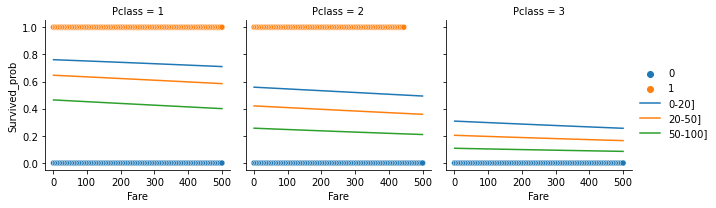

In [68]:
# Alternative with less clutter

g = sns.FacetGrid(mod_df_plot, col="Pclass")
g.map(sns.scatterplot, 
    'Fare',
    'Survived', 
    'Survived'
)

g.map(sns.lineplot, 
    'Fare',
    'Survived_prob',
    'age_filled_binned'
    )

g.add_legend()

